In [ ]:
import numpy as np
from PIL import Image
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def img_to_array():
    Tk().withdraw()  
    path = askopenfilename(title="Select an image file")
    if not path:
        print("No file selected!")
        return None
    
    img = Image.open(path)
    img_array = np.array(img)
    
    if len(img_array.shape) == 2: 
        save_path = "grayscale_image.txt"
        np.savetxt(save_path, img_array, fmt="%d")
        print(f"Grayscale image saved as '{save_path}'")
    elif len(img_array.shape) == 3:  
        save_path = "rgb_image.txt"
        np.savetxt(save_path, img_array.reshape(-1, img_array.shape[2]), fmt="%d")
        print(f"RGB image saved as '{save_path}'")
    else:
        print("Unknown image format!")
        return None
    
    return save_path, img_array.shape

def load_image_from_file(file_path, shape=None):
    arr = np.loadtxt(file_path, dtype=int)
    if shape and len(shape) == 3: 
        arr = arr.reshape(shape)
    return arr

saved_file_info = img_to_array()
if saved_file_info:
    saved_file, shape = saved_file_info
    loaded_image = load_image_from_file(saved_file, shape)
    print("Image loaded successfully!")
    print(loaded_image)

RGB image saved as 'rgb_image.txt'
Image loaded successfully!
[[[204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [204 204 251 255]
  [204 204 251 255]
  [204 204 251 255]]]


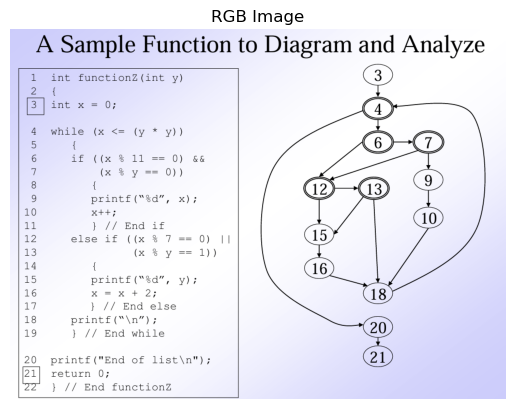

In [2]:
import matplotlib.pyplot as plt

# Assuming `loaded_image` is the NumPy array you got from load_image_from_file

# For grayscale images
if len(loaded_image.shape) == 2:
    plt.imshow(loaded_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')


# For RGB images
elif len(loaded_image.shape) == 3:
    plt.imshow(loaded_image)
    plt.title("RGB Image")
    plt.axis('off')
    plt.show()
